# Worksheet

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("data.csv")

In [10]:
def time_to_minutes(time):
    factors = (60, 1, 1/60)
    t1 = sum(i*j for i, j in zip(map(int, time.split(':')), factors))
    return t1

In [13]:
df['minutes'] = df['alarm (%H:%M:%S)'].apply(time_to_minutes)

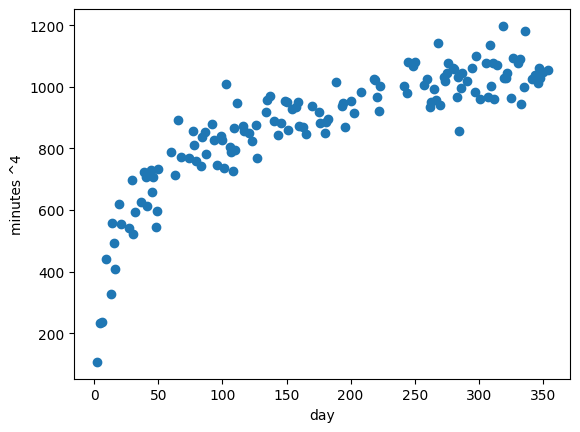

In [63]:
plt.scatter(df['day'], (df['minutes']))
plt.xlabel("day")
plt.ylabel("minutes ^4")
plt.show()

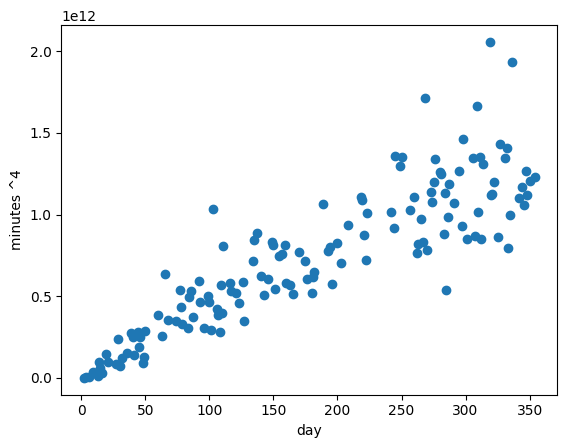

In [26]:
plt.scatter(df['day'], (df['minutes'])**4)
plt.xlabel("day")
plt.ylabel("minutes ^4")
plt.show()

In [41]:
X = np.asarray(df['day']).reshape(-1, 1)
y = np.asarray((df['minutes'])**4)

In [62]:
import datetime
X_2 = np.asarray(df['day']).reshape(-1, 1)
y_2 = np.asarray((df['minutes']))
reg = LinearRegression().fit(X_2, y_2)

X_pred = np.asarray([356]).reshape(-1, 1)
result = reg.predict(X_pred)
str(datetime.timedelta(result[0]))

'1143 days, 11:37:29.464827'

In [42]:
reg = LinearRegression().fit(X, y)

In [43]:
reg.score(X, y)

0.7743185922021045

In [50]:
X_pred = np.asarray([356]).reshape(-1, 1)
result = reg.predict(X_pred) ** 0.25

In [52]:
result[0]

np.float64(1080.9983866943558)

In [59]:
import datetime
def minutes_to_time(minutes):
    return str(datetime.timedelta(minutes=minutes))
minutes_to_time(result[0])

'18:00:59.903202'

## Linear Regression

Where does randomness come from?

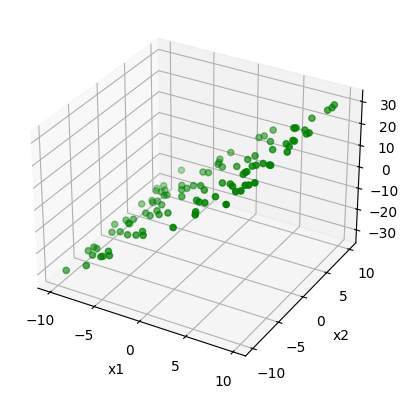

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

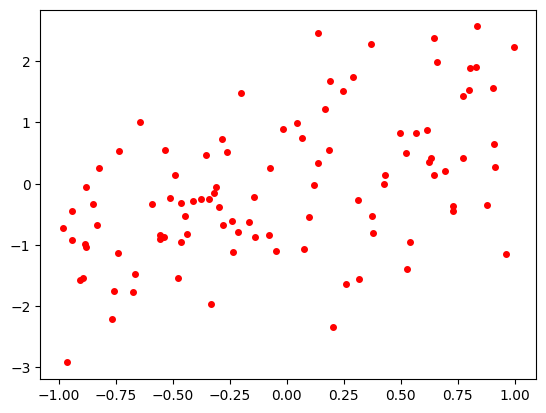

In [69]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([0 ,1 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

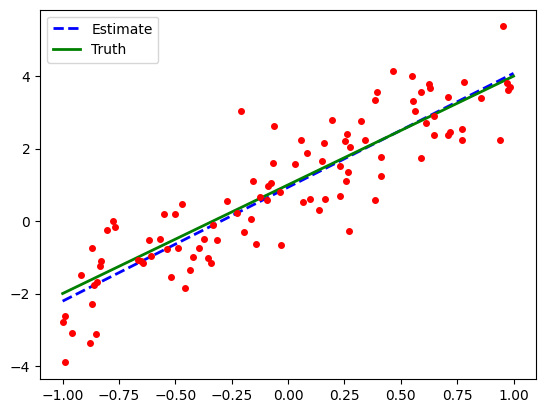

In [12]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = ...

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

e) Plot the least squares estimate line through the scatter plot.

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

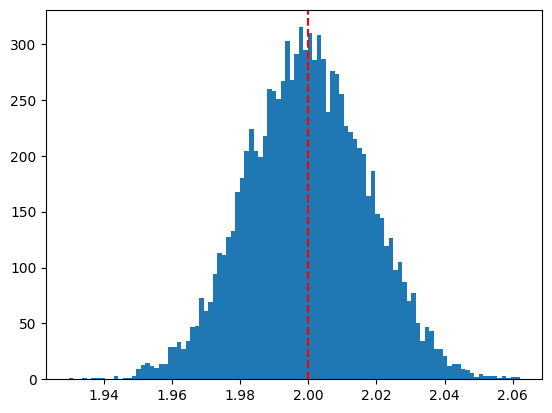

In [3]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
betas = []
true_beta = np.array([ 1, 2 ])
for _ in range(10000):
    x = -10 + 20 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])

    X = np.array([intercept, x]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()